<a href="https://colab.research.google.com/github/Arechini/Projeto-Rede-Neural-MNIST/blob/main/Primeira_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [17]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


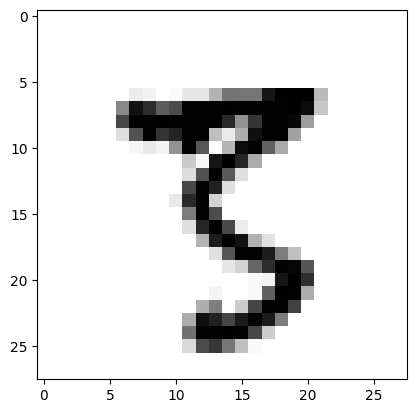

In [26]:
dataiter= iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [19]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128)
    self.linear2 = nn.Linear(128, 64)
    self.linear3 = nn.Linear(64, 10)

    def forward(self,X):
      X = F.relu(self.linear1(X))
      X = F.relu(self.linear2(X))
      X = self.linear3(X)
      return F.log_softmax(X, dim=1)


In [20]:
def treino(modelo, trainloader, device):

  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()

  criterio = nn.NLLoss()
  EPOCHS = 10
  modelo.train()

  for epoch in range(EPOCHS):
    perda_acumulada = 0

    for imagens, etiquestas in trainloader:
       imagens = imagens.view(imagens.shape[0])
       otimizador.zero_grad()

       output = modelo(imagens.todevice)
       perda_instantanea = criterio(output, etiquestas.to(device))

       perda_instantanea.backward()

       otimizador.step()

       perda_acumulada += perda_instantanea.item()

    else:
        print("Epoch {} - Perda resultante {}".format(apoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em Mnutos) =",(time()-inicio)/60)


In [ ]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)
      with torch.no_grad():
        logps = modelo(img.to(device))

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueda_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas +=1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo= {}%".format(conta_corretas*100/conta_todas))
